# Маркетинговый анализ с использованием метода bootstrap ("бутстрап")

<span style='font-size: 14pt'>Для этого задния я буду использовать базу данных сети продуктовых магазинов, скачанную с сайта kaggle</span>  
  
Этот датасет содержит информацию о 2240 клиентах и о шести рекламных кампаниях, причём первые пять рекламных акций - подготовительные, а последняя - целевая.  
   
<span style='font-size: 14pt'>Поля, которые содержит таблица:</span>
<style>
.blue-bg { background-color: #AEEDF5; }
</style>
1. Реакция клиентов на рекламные акции
- AcceptedCmp1 — принял ли клиент предложение в <span class='blue-bg'>первой</span> кампании, 0 или 1
- AcceptedCmp2 — принял ли клиент предложение во <span class='blue-bg'>второй</span> кампании, 0 или 1
- AcceptedCmp3 — принял ли клиент предложение в <span class='blue-bg'>третьей</span> кампании, 0 или 1
- AcceptedCmp4 — принял ли клиент предложение в <span class='blue-bg'>четвёртой</span> кампании, 0 или 1
- AcceptedCmp5 — принял ли клиент предложение в <span class='blue-bg'>пятой</span> кампании, 0 или 1
- Response — принял ли клиент предложение в <span class='blue-bg'>последней (целевой)</span> кампании, 0 или 1

2. Информация о клиентах
- DtCustomer - дата, когда клиент стал "известным" для компании, например получил карту лояльности или зарегестрировался на сайте
- Education — уровень образования клиента
- Marital — семейное положение клиента
- Kidhome — количество маленьких детей в семье клиента
- Teenhome — количество подростков в семье клиента
- Доход — годовой доход домохозяйства клиента

3. Информация о тратах клиента на определённые виды продуктов
- MntFishProducts — сумма, потраченная на <span class='blue-bg'>рыбную продукцию</span> за последние 2 года
- MntMeatProducts — сумма, потраченная на <span class='blue-bg'>мясную продукцию</span> за последние 2 года
- MntFruits — сумма, потраченная на <span class='blue-bg'>фруктовую продукцию</span> за последние 2 года
- MntSweetProducts — сумма, потраченная на <span class='blue-bg'>сладкие продукты</span> за последние 2 года
- MntWines — сумма, потраченная на <span class='blue-bg'>винную продукцию</span> за последние 2 года
- MntGoldProds — сумма, потраченная на <span class='blue-bg'>золотые изделия</span> за последние 2 года

4. Поведение клиента
- Complain — 1, если клиент жаловался в течение последних 2 лет
- NumDealsPurchases — количество покупок, совершённых <span class='blue-bg'>со скидкой</span>
- NumCatalogPurchases — количество покупок, совершённых <span class='blue-bg'>по каталогу</span>
- NumStorePurchases — количество покупок, совершённых <span class='blue-bg'>непосредственно в магазинах</span>
- NumWebPurchases — количество покупок, совершённых <span class='blue-bg'>через веб-сайт компании</span>
- NumWebVisitsMonth — количество посещений веб-сайта компании за последний месяц
- Recency — количество дней с момента последней покупки

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# импортируем данные
data = pd.read_csv('/Users/alferova_tv/Documents/Statistics/marketing/archive/marketing_campaign.csv', sep=';')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## I. Полупараметрический bootstrap

Используем его в регрессионном анализе. Проверим, есть ли зависимость между количеством детей в семье клиента и суммой, потраченной им на сладкие продукты за последние 2 года.  
Интуитивно хочется предположить, что такая зависимость есть: больше детей - больше сладостей (линейная регрессия)

То есть, предполагаем, что существует такая функция y = 𝛽₀ + 𝛽₁x₁ + ⋯ + 𝛽ᵣxᵣ + 𝜀, где y - сумма трат на сладкое, x - количество детей в семье, 𝛽 - коэффициенты, 𝜀 - погрешность

In [3]:
data['num_children'] = data['Kidhome'] + data['Teenhome'] # новый столбец - общее количество детей

# создаём массивы из наших полей
x = np.array(data['num_children']).reshape(-1, 1) # независимая переменная
y = np.array(data['MntSweetProducts']) # зависимая переменная

model = LinearRegression().fit(x, y) # модель линейной регрессииё
beta0 = model.intercept_
beta1 = model.coef_[0]

# посмотрим коэффициенты модели
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

y_pred = model.predict(x)

Intercept (β0): 47.05801280479697
Slope (β1): -21.037552222989763


Итерпретация:
Результат получился неожиданный: количество детей, вопреки интуитивным догадкам, уменьшает траты клиента на сладкое.  
Или буквально: траты на сладкое = 47.06  –  21.04 * число_детей
- средние траты на сладости у клиента без детей - примерно 47
- каждый дополнительный ребёнок уменьшает траты на сладости примерно на 21

Такой результат может говорить о том, что семьи с детьми больше экономят и покупают в основном базовые продукты (молоко, хлеб, мясо).
Также возможно, что в данных просто мало детей

In [4]:
print(data.groupby(['num_children'])['ID'].count())
print()
print(data.groupby('num_children')['MntSweetProducts'].mean())

num_children
0     638
1    1128
2     421
3      53
Name: ID, dtype: int64

num_children
0    53.061129
1    20.295213
2     8.370546
3     6.622642
Name: MntSweetProducts, dtype: float64


И правда, троих детей имеют всего 2,3% клиентов, и с увеличением детей уменьшается средняя сумма трат на сладости

In [5]:
# посмотрим качество модели
print(model.score(x, y))

0.14679404935587625


Количество детей объясняет примерно 14.7% вариации трат на сладкие продукты. Есть слабая зависимость, но для маркетинговых данных, где поведение клиента зависит от множества факторов это нормально.  
Вывод: есть зависимость, но она слабая

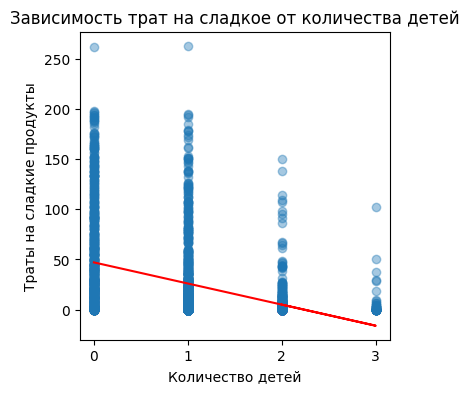

In [6]:
# построим диаграмму рассеяния с линией регрессии
plt.figure(figsize=(4,4))

plt.scatter(x, y, alpha=0.4)

plt.plot(x, y_pred, color='red')

plt.xticks([0, 1, 2, 3])
plt.xlabel('Количество детей')
plt.ylabel('Траты на сладкие продукты')
plt.title('Зависимость трат на сладкое от количества детей') 

plt.show()

Теперь усилим характеристики регрессии с помощью полупараметрического бутстрапа.  
Для данного случая он подходиит больше других, так как x представляет собой несколько категорий (0, 1, 2, 3) и в бутстрап-выборках частоты категорий будут случайными, это будет искажать реальное распределение. 
В полупараметрическом бутстрапе мы будем бутстрапировать не сами выборки, а ошибку 𝜀,

Пошагово:<br>
1. Находим остатки 𝜀<br>
2. Перемешиваем остатки<br>
3. Создаём новые значения y* = ŷ + ε*<br>
4. Обучаем регрессию на данных (x, y*)<br>
5. Сохраняем β₁*<br>
6. Повторяем 2000<br>

В итоге получаем:<br>
- распределение β₁<br>
- доверительный интервал<br>
- вероятность того, что β₁ < 0<br>

In [7]:
residuals = y - y_pred # остатки модели

B = 2000
boot_betas = []
n = len(y)

for _ in range(B):
    # случайная выборка остатков с повторением
    eps_star = np.random.choice(residuals, size=n, replace=True)
    
    # генерируем новые y*
    y_star = y_pred + eps_star
    
    # обучаем регрессию на новых данных
    model_star = LinearRegression().fit(x, y_star)
    boot_betas.append(model_star.coef_[0])

boot_betas = np.array(boot_betas)

# Доверительный интервал
ci_low = np.percentile(boot_betas, 2.5)
ci_high = np.percentile(boot_betas, 97.5)

print('95% бутстрапный доверительный интервал для β1:', (ci_low, ci_high))
print('P(β1 < 0):', np.mean(boot_betas < 0))

95% бутстрапный доверительный интервал для β1: (np.float64(-23.143110208934168), np.float64(-19.02197391401105))
P(β1 < 0): 1.0


Интервал полностью отрицательный и довольно узкий.  
Ни в одной бутстрап-выборке коэффициент β1 не оказался большим либо равным 0

Посроим график распределения коэффииентов β1

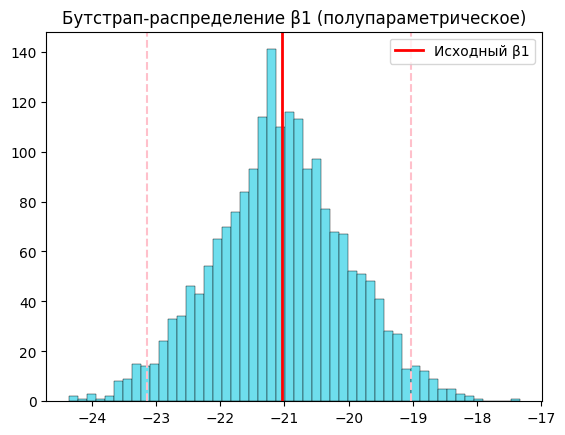

In [8]:
plt.hist(boot_betas, bins=50, edgecolor='black', linewidth=0.3, color='#6EDEED')
plt.axvline(beta1, color='red', linewidth=2, label='Исходный β1')
plt.axvline(ci_low, color='pink', linestyle='--')
plt.axvline(ci_high, color='pink', linestyle='--')
plt.title("Бутстрап-распределение β1 (полупараметрическое)")
plt.legend()
plt.show()

#### Резюме
>В рамках линейной модели и имеющегося набора данных увеличение количества детей статистически значимо связано со снижением трат на сладкие продукты. Однако это не доказывает причинно-следственную связь и может быть результатом других факторов